# COGS516 - Assignment 1

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

1. Suppose you have an ignorant prior about the proportion of the water on Earth's surface. Suppose the globe tossing data has 5 water and 2 land. Compute the posterior distribution using the grid approximation. Draw the posterior distribution plot.


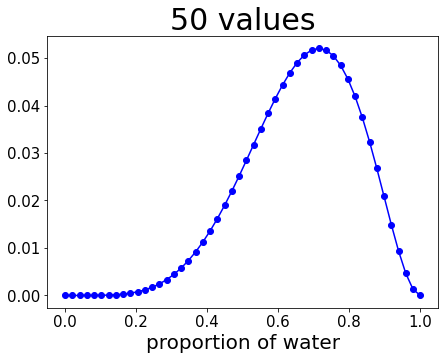

In [3]:
n = 50
x = np.linspace(0, 1, n)
prior = stats.uniform.pdf(x,0,1)
posterior = stats.binom.pmf(5,p = x,n = 7)*prior
posterior = posterior/sum(posterior)

fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel("proportion of water",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("{} values".format(n),fontsize=30)
ax.plot(x, posterior, 'b-o', label=('')) 


2. Suppose the globe tossing data has 5 water and 2 land. But your prior is zero below $p = 0.5$ and a constant above $p = 0.5$. Compute the posterior distribution using the grid approximation. Draw the posterior distribution plot.

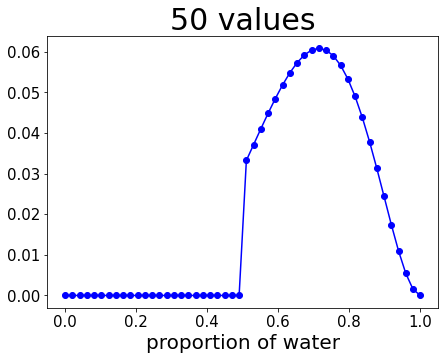

In [4]:
n = 50
x = np.linspace(0, 1, n)
prior = stats.uniform.pdf(x,0.5,1)
posterior = stats.binom.pmf(5,p = x,n = 7)*prior
posterior = posterior/sum(posterior)

fig, ax = plt.subplots(figsize=(7,5))
ax.set_xlabel("proportion of water",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("{} values".format(n),fontsize=30)
ax.plot(x, posterior, 'b-o', label=(''))


- Compute the mean, standard deviation and 93% Highest Density Interval (HDI) of the posterior. 

In [5]:
ns = 1000
samples = np.random.choice(x, size = ns,p = posterior,replace = True)
print(np.mean(samples))
print(np.std(samples))
print(az.hdi(samples, hdi_prob = 0.93))


0.7045918367346937
0.11695386696080017
[0.51020408 0.87755102]


3. In a 1963 issue of The Journal of Abnormal and Social Psychology, Stanley Milgram described a study in which he investigated the propensity of people to obey orders from authority figures, even when those orders may harm other people (Milgram 1963). In the paper, Milgram describes the study as:

> “consist[ing] of ordering a naive subject to administer electric shock to a victim. A simulated shock generator is used, with 30 clearly marked voltage levels that range from IS to 450 volts. The instrument bears verbal designations that range from Slight Shock to Danger: Severe Shock. The responses of the victim, who is a trained confederate of the experimenter, are standardized. The orders to administer shocks are given to the naive subject in the context of a `learning experiment’ ostensibly set up to study the effects of punishment on memory. As the experiment proceeds the naive subject is commanded to administer increasingly more intense shocks to the victim, even to the point of reaching the level marked Danger: Severe Shock.”

Suppose Milgram had a flat (Uniform) prior for probability that a participant will inflict maximum shock $\pi$. 40 people participated in the experiment and 26 of them inflicted maximum shock. Compute the posterior distribution for $\pi$ using grid approximation. Draw the posterior distribution plot, present the mean, standard deviation and 94% HDI of the posterior distribution. 



0.6442525252525253
0.07294512755151496
[0.51515152 0.76767677]


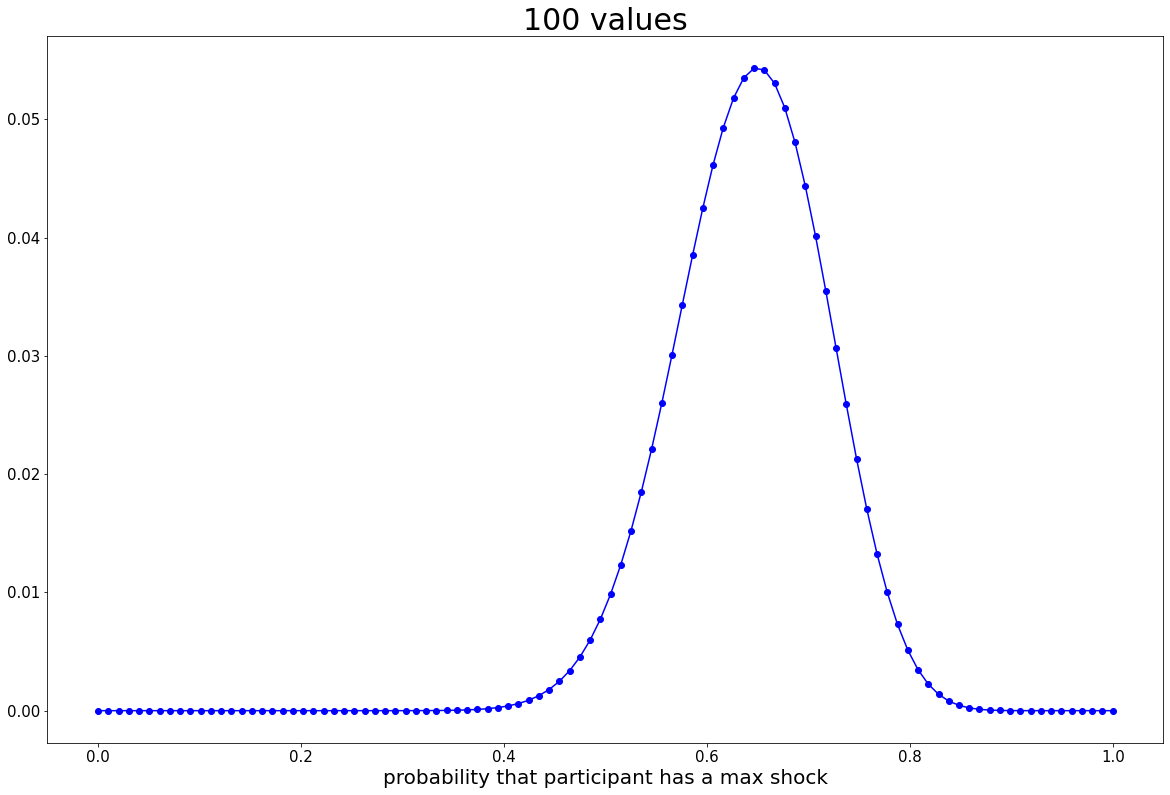

In [6]:
n = 100
x = np.linspace(0, 1, n)
prior = stats.uniform.pdf(x,0,1)
posterior = stats.binom.pmf(26,p = x,n = 40)*prior
posterior = posterior/sum(posterior)

fig, ax = plt.subplots(figsize=(20,13))
ax.set_xlabel("probability that participant has a max shock",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("{} values".format(n),fontsize=30)
ax.plot(x, posterior, 'b-o', label=(''))

ns = 1000
samples = np.random.choice(x, size = ns,p = posterior,replace = True)
print(np.mean(samples))
print(np.std(samples))
print(az.hdi(samples, hdi_prob = 0.94))


- Compute the probability that posterior distribution is greater than 0.5 $P(\pi \geq 0.5)$.

In [7]:
np.sum(samples >= 0.5) / ns

0.977

- Suppose Milgram had a low prior belief regarding the probability that a person will inflict shock $\pi$. Show this prior belief with an appropriate $\text{Beta}$ distribution. Compute the posterior distribution for this prior using grid approximation (40 participants, 26 incflict maximum shock). Draw the posterior distribution plot, present the mean, standard deviation and 94% HDI of the posterior distribution. 

0.5964242424242425
0.07036416417786069
[0.46464646 0.71717172]


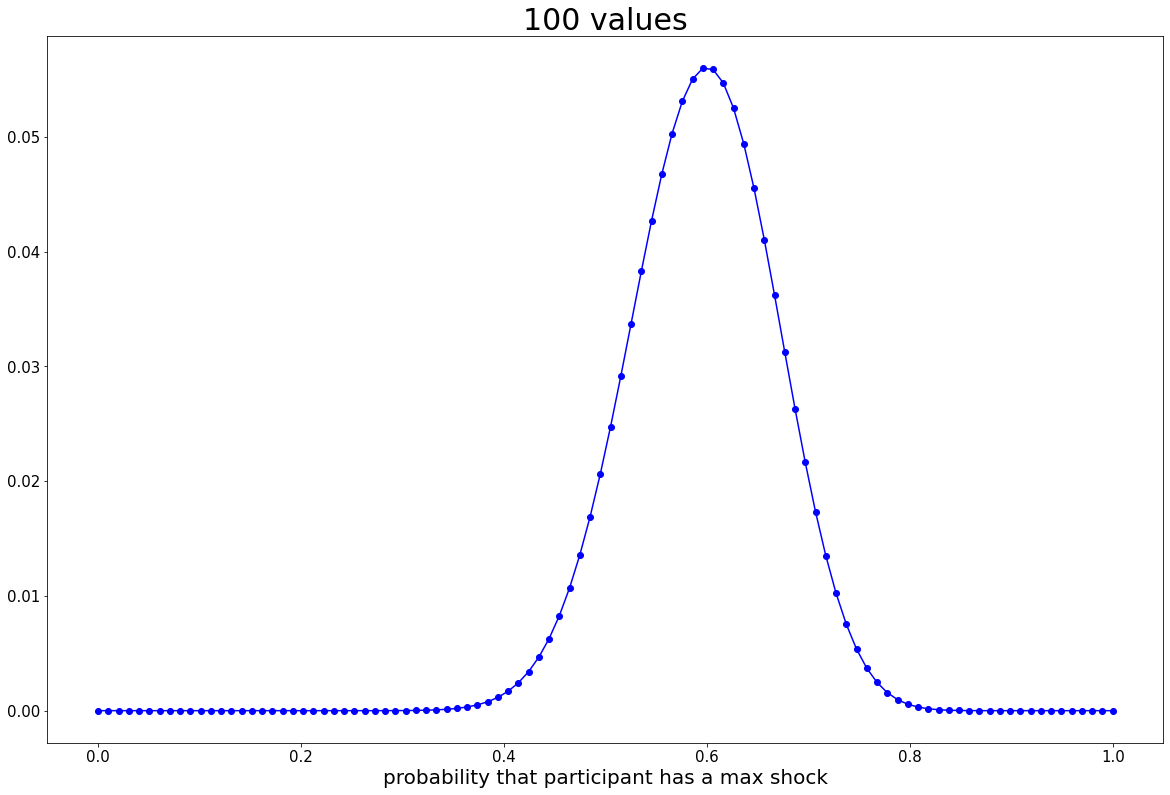

In [8]:
n = 100
x = np.linspace(0, 1, n)
prior = stats.beta.pdf(x,2,5)
posterior = stats.binom.pmf(26,p = x,n = 40)*prior
posterior = posterior/sum(posterior)

fig, ax = plt.subplots(figsize=(20,13))
ax.set_xlabel("probability that participant has a max shock",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title("{} values".format(n),fontsize=30)
ax.plot(x, posterior, 'b-o', label=(''))

ns = 1000
samples = np.random.choice(x, size = ns,p = posterior,replace = True)
print(np.mean(samples))
print(np.std(samples))
print(az.hdi(samples, hdi_prob = 0.94))